# Sheet 2: Solution

First, import a few commonly-used functions

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Exercise 1: Bias-variance tradeoff for k-nearest-neighbors (knn) classifier

In [2]:
iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)
iris.columns = ["Sepal_length", "Sepal_width", "Petal_length", "Petal_width", "Species"]
iris.head(8)

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa


Divide the data set into train and test as done on exercise sheet 1.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

iris.columns = ["Sepal_length", "Sepal_width", "Petal_length", "Petal_width", "Species"]
X=iris[['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']]  # Features
y=iris['Species'].to_numpy()  # Labels

# Normalise features
X_norm =normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.5) 

After splitting, you will train the model on the training set.

Text(0, 0.5, 'accuracy')

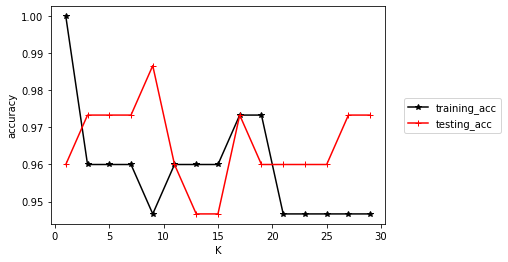

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Create a knn Classifier
acc_train = np.zeros(15)
acc_test = np.zeros(15)

for i,knn_neighbors in enumerate(np.arange(1,30,2)):
    knnmodel = KNeighborsClassifier(n_neighbors=knn_neighbors)
    knnmodel.fit(X_train, y_train) 
    acc_train[i] = accuracy_score(y_train,knnmodel.predict(X_train))
    acc_test[i]=accuracy_score(y_test,knnmodel.predict(X_test))

plt.plot(np.arange(1,30,2),acc_train,'k-*',label='training_acc')
plt.plot(np.arange(1,30,2),acc_test,'r-+',label='testing_acc')
plt.legend(loc=9, bbox_to_anchor=(+1.2, 0.6))
plt.xlabel('K')
plt.ylabel('accuracy')

In [0]:
#Import knn Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Create a knn Classifier
run_number = 100
acc_train = np.zeros((15,run_number))
acc_test = np.zeros((15,run_number))
for run in np.arange(run_number):
  X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.5) # 50% training and 50% test
  for i,knn_neighbors in enumerate(np.arange(1,30,2)):
      knnmodel = KNeighborsClassifier(n_neighbors=knn_neighbors)
      knnmodel.fit(X_train, y_train) 
      acc_train[i,run] = accuracy_score(y_train,knnmodel.predict(X_train))
      acc_test[i,run]=accuracy_score(y_test,knnmodel.predict(X_test))

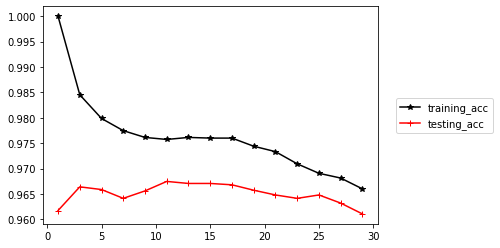

In [0]:
plt.plot(np.arange(1,30,2),np.mean(acc_train,axis =1),'k-*',label='training_acc')
plt.plot(np.arange(1,30,2),np.mean(acc_test,axis = 1),'r-+',label='testing_acc')
plt.legend(loc=9, bbox_to_anchor=(+1.2, 0.6))

# Optional: Implement KNN from scratch

We can also implement KNN model from *scratch*

In [0]:
def KNNModel(Xtr, Ytr, K, Xte):
    Xtr = np.asarray(Xtr)
    Ytr = np.asarray(Ytr)
    classes = list(np.unique(Ytr))
    
    mtr, ntr = np.asarray(Xtr).shape
    mte, nte = np.asarray(Xte).shape
    num_class = len(classes)
    # Yte = np.tile(Ytr[0], (mte, 1)) 
    Yte = []
    
    K = min(K, mtr)    # can't use more neighbors than training set
    
    for i in range(mte):    # for each sample
        # calculate the distance, we use Euclidean distance here
        dist = np.sum(np.power(Xtr - np.asarray(Xte)[i, :], 2), axis=1)
        # find K nearest neighbors
        K_nearest_idx = np.argsort(dist, axis=0)[0:K]
        sorted_dist = dist[K_nearest_idx]
        # count the number of each label
        count = np.zeros((num_class,))
        for c in range(num_class):
            count[c] = np.sum(Ytr[K_nearest_idx] == classes[c])
        c_max = np.argmax(count)
        Yte.append(classes[c_max])
    return np.array(Yte)

Plot training and testing error as a function of K using your own implemented KNN model

In [0]:
#Create a knn Classifier
run_number = 100
acc_train = np.zeros((15,run_number))
acc_test = np.zeros((15,run_number))
for run in np.arange(run_number):
  X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.5) # 50% training and 50% test
  for i,knn_neighbors in enumerate(np.arange(1,30,2)):
      acc_train[i,run] = accuracy_score(y_train,KNNModel(X_train, y_train, knn_neighbors, X_train))
      acc_test[i,run]=accuracy_score(y_test,KNNModel(X_train, y_train, knn_neighbors, X_test))

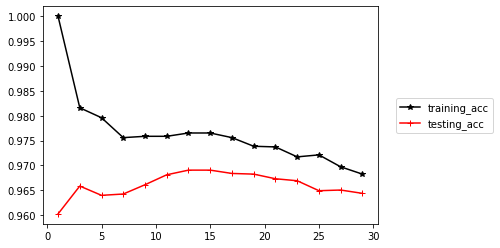

In [0]:
plt.plot(np.arange(1,30,2),np.mean(acc_train,axis =1),'k-*',label='training_acc')
plt.plot(np.arange(1,30,2),np.mean(acc_test,axis = 1),'r-+',label='testing_acc')
plt.legend(loc=9, bbox_to_anchor=(+1.2, 0.6))

# Exercise 2: Expected prediction error

We can compute, for a grid of threshold values, the average
prediction error for each of these threshold values, as:
\begin{eqnarray*}
\textrm{EPE}(f_t) & = &  P(X < t \mid Y = 1)/2 +  P(X
\geq t \mid Y = 0)/2 \\
%& = & 0.5 \int_{-\infty}^t \phi_3(t) \mathrm{d} t + 0.5 \int_t^{\infty} \phi_0(t) \mathrm{d} t \\
& = & (\Phi_3(t) + 1 - \Phi_0(t))/2.\\
& \text{because} & X | (Y=1) \sim N (3,1),X | (Y=0) \sim N (0,1)
\end{eqnarray*}
Note that $\Phi_{\mu}$ is the cumulative distribution function for the normal
distribution with mean $\mu$ and variance 1.

We can plot the theoretical EPE with:

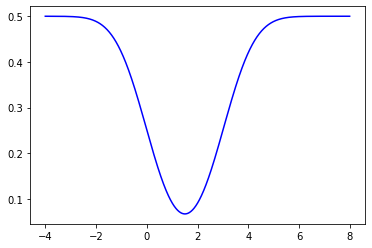

In [0]:
from scipy.stats import norm
def theoMisclas(t):
    return (norm.cdf(t,3,1)+1-norm.cdf(t))/2

thres = np.arange(-4, 8, 0.01)
theoEPE = theoMisclas(thres)
plt.figure()
plt.plot(thres,theoEPE,color='blue',label='Theoretical')

We can compute the optimal $\hat{t}$, as:
\begin{eqnarray*}
\hat{t} &=& \textrm{argmin}_t\textrm{EPE}(f_t) \\
& = &\textrm{argmin}_t (\Phi_3(t) + 1 - \Phi_0(t))/2.\\
& = &\textrm{argmin}_t\left(\textrm{erf}\left(\frac{t-3}{\sqrt{2}}\right)-\textrm{erf}\left(\frac{t}{\sqrt{2}}\right)\right)\\
\end{eqnarray*}
Take the derivative of the above function and set it to $0$, so $N(t|3,1)=N(t|0,1)->(t-3)^2=t^2->t=1.5$

The simulation can be done as follows:

In [0]:
import numpy as np
N = 1000
Y = np.random.binomial(1, 0.5 ,N) # Random number generated from Binomial distribution
mu = 3*Y
X = np.random.normal(mu,1,N)

This is just one way, where we use that <b>random.normal</b> take a
vector as mean values.

The density plot shows the empirical
marginal distribution of $X$ and the empirical conditional distributions of $X$
divided according to the two groups.

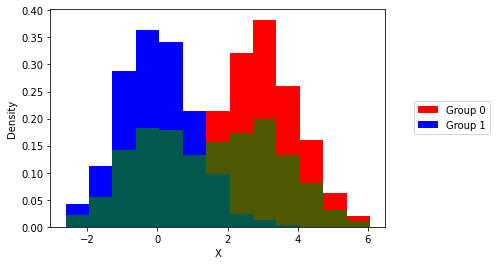

In [0]:
bins = 13
plt.hist(X[Y==1], bins=bins,density=True, color='r', alpha=1.0, label='Group 0',range = (np.min(X),np.max(X)))
plt.hist(X[Y==0], bins=bins,density=True, color='b', alpha=1.0, label='Group 1',range = (np.min(X),np.max(X)))
plt.hist(X,bins=bins,density=True, color='g', alpha=0.7)
plt.xlabel('X')
plt.ylabel('Density')
plt.legend(loc=9, bbox_to_anchor=(+1.2, 0.6))

We compute the empirical error function as:

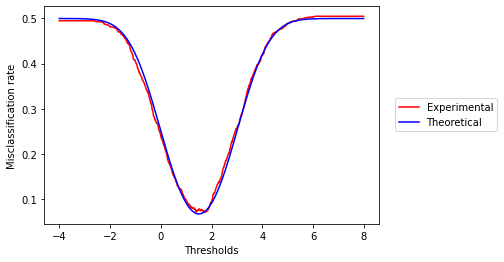

In [0]:
from scipy.stats import norm
def aveMisclas(t):
    return np.mean((X >= t) != Y)


thres = np.arange(-4, 8, 0.01)
aveMisclasFunc = np.vectorize(aveMisclas)
empEPE = aveMisclasFunc(thres)

plt.figure()
plt.plot(thres, empEPE,color='red',label='Experimental')
plt.plot(thres,theoEPE,color='blue',label='Theoretical')
plt.xlabel('Thresholds')
plt.ylabel('Misclassification rate')
plt.legend(loc=9, bbox_to_anchor=(+1.2, 0.6))